# Исследование рынка компьютерных игр

**Описание проекта:**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Мы планируем кампанию на 2017-й год. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:**

Выявить определяющие успешность игры закономерности для планирования рекламной кампании на будущий период.

**Задачи:**

1. Предобработка данных;
2. Исследовательский анализ данных;
3. Составление портретов пользователей по регионам;
4. Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.

## Предобработка данных

Импорт библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st

Откроем файл с данными:

Выведем на экран общую информацию о датафрейме и первые 10 строк:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приведём названия столбцов к snake case:

In [5]:
df = df.rename(columns = {'Name': 'name',
                          'Platform': 'platform', 
                         'Year_of_Release': 'year_of_release',
                         'Genre': 'genre',
                         'NA_sales': 'na_sales',
                         'EU_sales': 'eu_sales',
                         'JP_sales': 'jp_sales',
                         'Other_sales': 'other_sales',
                         'Critic_Score': 'critic_score',
                         'User_Score': 'user_score',
                         'Rating': 'rating'})

Проверим данные на наличие явных (полных) дубликатов:

In [6]:
df.duplicated().sum()

0

Также проверим на наличие неявных дубликатов по столбцу 'genre':

In [7]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Явные  и неявные дубликаты в таблице отсутствуют.

Приведём данные в столбце 'year_of_release' к целочисленному типу, т.к. значение года не может быть числом с плавающей точкой:

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [9]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Проверим, в каких столбцах есть пропуски и оценим их долю в общем количестве данных в столбцах:

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

В столбце 'critic_score' пропуски составляют больше 50% данных (51,32%), также высока доля пропусков в столбцах 'user_score' и 'rating'. Пропуски в столбцах с оценками критиков и пользователей заменить невозможно, поскольку эти значения зависят от большого количества факторов и спрогнозировать их (или даже приблизительно представить) невозможно. Значения в столбце, содержащем данные о рейтинге игры, не зависят от названия и жанра, поэтому пропуски в этом столбце заменить нельзя, не зная точной информации. Учитывая большую долю пропусков в этом столбце, заменять их вручную путём поиска соответствующей информации также не представляется возможным.

Также обнаружены пропуски в столбце 'year_of_release' - их доля меньше (1,61%). Это значение также не зависит от данных других столбцов таблицы, поэтому подобрать способ для автоматизированного заполнения таких пропусков невозможно.

Кроме того, мы видим по два пропуска в столбцах 'name' и 'genre'. Посмотрим на эти строки:

In [12]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в обоих столбцах относятся к одним и тем же строкам. Кроме того, данные строки в целом содержат немного данных для анализа. Учитывая долю, которую эти строки составляют от общего количества строк таблицы, такие строки можно удалить:

In [13]:
df = df.dropna(subset = ['name'])

Так как пропуски в стобце с данными о рейтинге игры мы не можем заполнить какими-либо значениями, устраним их при помощи замены отсутствующих значений на 'unknown':

In [14]:
df['rating'] = df['rating'].fillna('unknown')

Существование пропусков в данных можно объяснить следующими причинами:
- ошибки при выгрузке данных;
- ошибки при преобразовании одного типа данных в другой;
- ошибки при записи данных в базу данных;
- ошибки при восстановлении, если происходили сбои в хранении;
- отсутствие данных на момент записи данных в базу данных.

Посмотрим на уникальные значения в столбце 'user_score':

In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме пропусков в данном столбце можно заметить одно нечисловое значение, а именно 'tbd'. Аббревиатура TBD расшифровывается как 'to be determined', или 'подлежит уточнению'. То есть фактически строки с таким значением можно считать пропусками, т.к. информации об оценке в данном случае не содержится. Однако менять такое значение на None нет смысла (не стоит множить пропуски в данных), но и заменить их невозможно - о невозможности нахождения логической замены для пропусков в этом столбце говорилось выше.

Для каждой из игр рассчитаем сумму продаж во всех регионах и добавим в отдельный столбец:

In [16]:
df['total_sales'] = (df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']).copy()

In [17]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Исследовательский анализ данных

Рассмотрим распределение количества выпущенных игр по годам:

In [18]:
year_group = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
year_group['rate'] = (year_group['name'] / year_group['name'].sum()) * 100
year_group

,year_of_release,name,rate
0,1980,9,0.054731
1,1981,46,0.279737
2,1982,36,0.218925
3,1983,17,0.103381
4,1984,14,0.085137
5,1985,14,0.085137
6,1986,21,0.127706
7,1987,16,0.097300
8,1988,15,0.091219
9,1989,17,0.103381


В таблице собраны данные об играх, выпущенных с 1980 по 2016гг. Визуализируем эти данные:

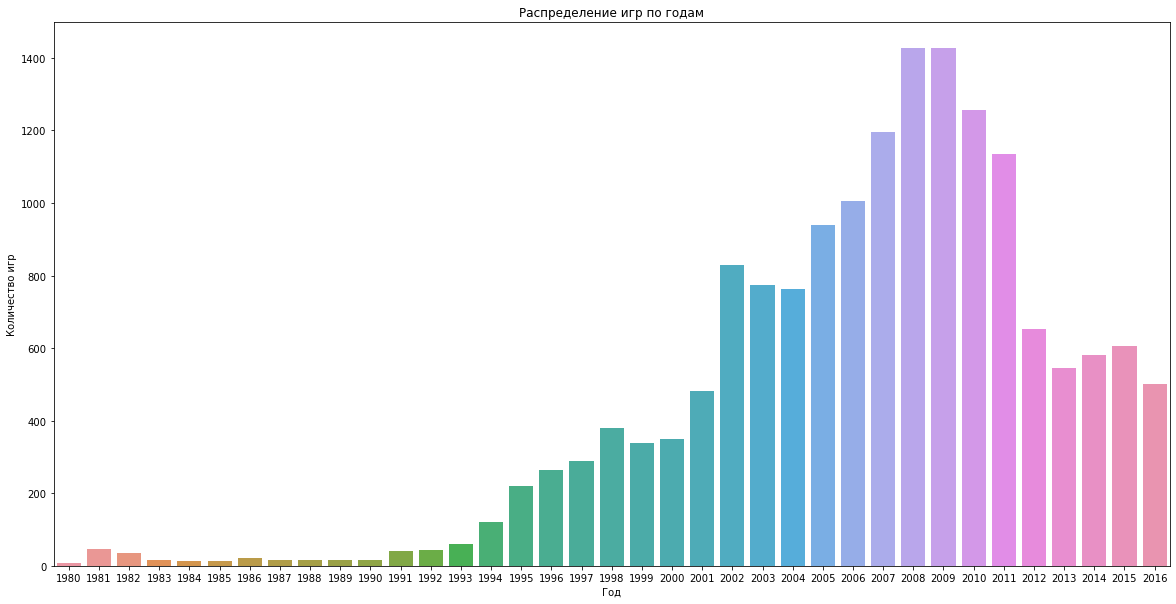

In [19]:
plt.figure(figsize=(20,10))
games_by_years = seaborn.barplot(x = year_group['year_of_release'], y = year_group['name'])
games_by_years.axes.set_title('Распределение игр по годам')
games_by_years.set_xlabel('Год')
games_by_years.set_ylabel('Количество игр')
games_by_years;

На графике видим тенденцию роста выпускаемых игр по годам к 2008-2009гг., однако неравномерную - например, в 1998г. и 2002г. игр было выпущено больше, чем в годах, следующих за ними (1999 и 2003гг. соответственно). Наибольшее количество игр выпущено в 2008 и 2009 гг. - 1427 и 1426, что составляет около 17% от всех игр, данные по которым собраны в таблице. После 2011г. наблюдается резкий спад количества выпускаемых игр.

Для планирования кампании по продажам игр нет смысла рассматривать данные всех лет - например, данные об играх, выпущенных в 1980г., не помогут спрогнозировать продажи игр в 2017г. Для анализа рынка имеет смысл использовать более "свежие" данные в силу различных факторов, например, таких как: 
- появление новых игровых платформ;
- смена поколений используемых консолей;
- развитие игровой индустрии в целом.

Рассмотрим распределение продаж в разрезе платформ:

In [20]:
platform_sales = df.pivot_table(index = df['platform'], values = 'total_sales', aggfunc = 'sum').reset_index()
platform_sales['rate'] = (platform_sales['total_sales'] / platform_sales['total_sales'].sum()) * 100
platform_sales

,platform,total_sales,rate
0,2600,96.98,1.088038
1,3DO,0.10,0.001122
2,3DS,259.00,2.905773
3,DC,15.95,0.178946
4,DS,806.12,9.044023
5,GB,255.46,2.866057
6,GBA,317.85,3.566023
7,GC,198.93,2.231836
8,GEN,28.35,0.318064
9,GG,0.04,0.000449


Также визуализируем данные на графике:

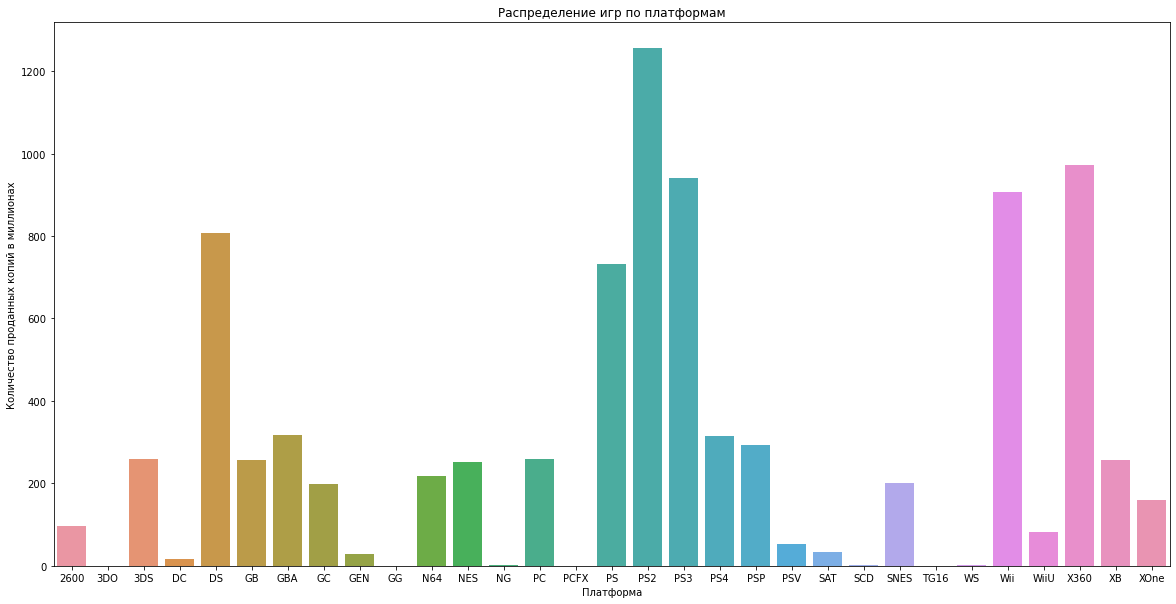

In [21]:
plt.figure(figsize=(20,10))
games_by_platforms = seaborn.barplot(x = platform_sales['platform'], y = platform_sales['total_sales'])
games_by_platforms.axes.set_title('Распределение игр по платформам')
games_by_platforms.set_xlabel('Платформа')
games_by_platforms.set_ylabel('Количество проданных копий в миллионах')
games_by_platforms;

На графике чётко выделяются платформы как с наибольшими (например, PS2 - 14% от суммы всех продаж за все годы), так и с наименьшими продажами - несколько платформ с долей менее 1% от общих продаж, на графике почти не видны.

Выберем топ-10 платформ по сумме продаж:

In [22]:
platform_sales.sort_values(by = 'total_sales', ascending = False).head(10)

,platform,total_sales,rate
16,PS2,1255.77,14.088737
28,X360,971.42,10.898557
17,PS3,939.65,10.542123
26,Wii,907.51,10.181538
4,DS,806.12,9.044023
15,PS,730.86,8.199666
6,GBA,317.85,3.566023
18,PS4,314.14,3.524400
19,PSP,294.05,3.299006
13,PC,259.52,2.911607


Такими платформами оказались:
1. PlayStation 2;
2. Xbox 360;
3. PlayStation 3;
4. Nintendo Wii;
5. Nintendo DS;
6. PlayStation;
7. Nintendo Game Boy Advance;
8. PlayStation 4;
9. PlayStation Portable;
10. Персональный компьютер.

Для каждой из этих платформ рассмотрим распределение продаж игр по годам и построим соответствующие графики. Напишем функцию для построения графика по данным сводной таблицы, которая будет принимать следующие параметры:
- **xdata** - данные для оси x;
- **ydata** - данные для оси y;
- **title** - название графика;
- **xlabel** - подпись оси x;
- **ylabel** - подпись оси y.

In [23]:
def df_bar(xdata, ydata, title, xlabel, ylabel):
    f = seaborn.barplot(x = xdata, y = ydata)
    f.axes.set_title(title)
    f.set_xlabel(xlabel)
    f.set_ylabel(ylabel)
    return f

Для PlayStation 2:

In [24]:
ps2_sales = df[df['platform'] == 'PS2'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
ps2_sales

,year_of_release,total_sales
0,2000,0.477683
1,2001,0.899622
2,2002,0.733500
3,2003,0.719961
4,2004,0.817799
5,2005,0.617923
6,2006,0.399305
7,2007,0.355093
8,2008,0.282199
9,2009,0.275000


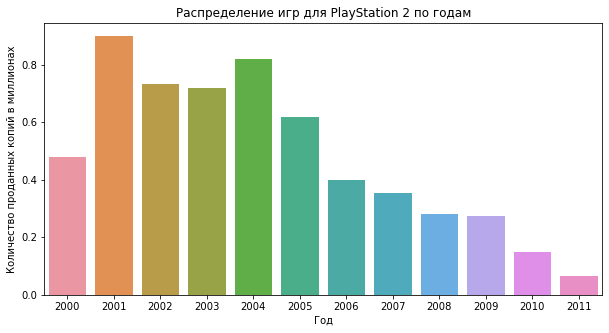

In [25]:
plt.figure(figsize=(10, 5))
df_bar(ps2_sales['year_of_release'], 
       ps2_sales['total_sales'], 
       'Распределение игр для PlayStation 2 по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Наибольшее количество игр для PlayStation 2 было продано в 2001г., после чего наблюдается спад продаж к 2011г.

Для Xbox 360:

In [26]:
x360_sales = df[df['platform'] == 'X360'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
x360_sales

,year_of_release,total_sales
0,2005,0.458333
1,2006,0.555054
2,2007,0.775691
3,2008,0.926438
4,2009,0.699360
5,2010,0.934231
6,2011,0.698252
7,2012,0.940943
8,2013,1.181067
9,2014,0.551429


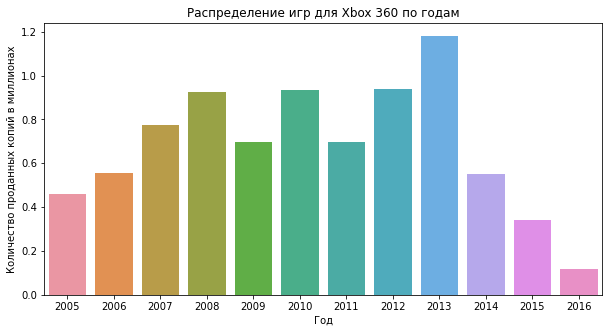

In [27]:
plt.figure(figsize=(10, 5))
df_bar(x360_sales['year_of_release'], 
       x360_sales['total_sales'], 
       'Распределение игр для Xbox 360 по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Для игр на Xbox 360 на графике видим рост количества проданных копий с 2005 по 2008гг. и спад продаж с 2013 по 2016гг. В промежутке между 2008 и 2013гг. количество игр менялось без выраженной тенденции.

Для PlayStation 3:

In [28]:
ps3_sales = df[df['platform'] == 'PS3'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
ps3_sales

,year_of_release,total_sales
0,2006,0.776296
1,2007,0.813222
2,2008,0.858841
3,2009,0.808210
4,2010,0.785470
5,2011,0.729209
6,2012,0.725405
7,2013,0.898810
8,2014,0.442222
9,2015,0.230411


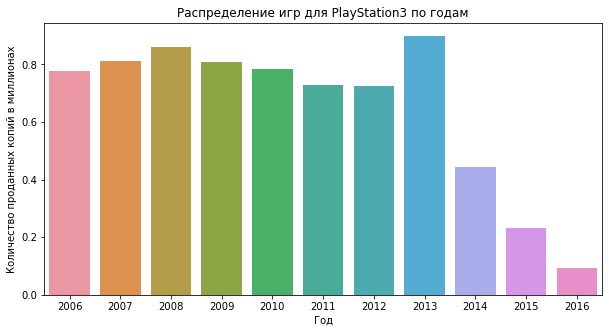

In [29]:
plt.figure(figsize=(10, 5))
df_bar(ps3_sales['year_of_release'], 
       ps3_sales['total_sales'], 
       'Распределение игр для PlayStation3 по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Для PlayStation 3 с 2006 по 2012гг. распределение проданных копий было почти равномерным, далее мы видим на графике увеличение количества проданных игр в 2013г, и затем - резкий спад.

Для Nintendo Wii:

In [30]:
wii_sales = df[df['platform'] == 'Wii'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
wii_sales

,year_of_release,total_sales
0,2006,3.117045
1,2007,0.825784
2,2008,0.607518
3,2009,0.636831
4,2010,0.505731
5,2011,0.417133
6,2012,0.700323
7,2013,0.715833
8,2014,0.625000
9,2015,0.285000


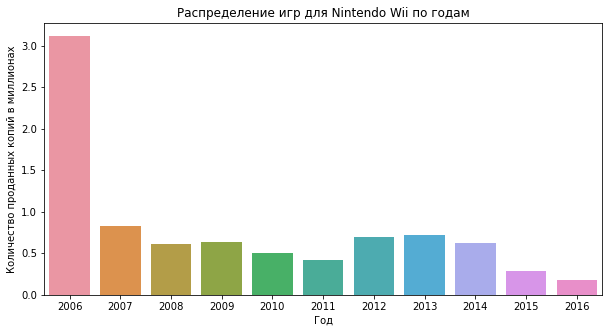

In [31]:
plt.figure(figsize=(10, 5))
df_bar(wii_sales['year_of_release'], 
       wii_sales['total_sales'], 
       'Распределение игр для Nintendo Wii по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Для этой платформы мы наблюдаем превалирующее количество проданных игр в год выхода консоли (более 3 млн. копий), и во все последующие годы - значительно меньшие количества, среди которых наблюдается тенденция к снижению с некоторым всплеском в 2012-2014гг.

Для Nintendo DS:

In [32]:
ds_sales = df[df['platform'] == 'DS'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
ds_sales

,year_of_release,total_sales
0,1985,0.020000
1,2004,0.750870
2,2005,1.102881
3,2006,0.596070
4,2007,0.390798
5,2008,0.295346
6,2009,0.296625
7,2010,0.263220
8,2011,0.171111
9,2012,0.478696


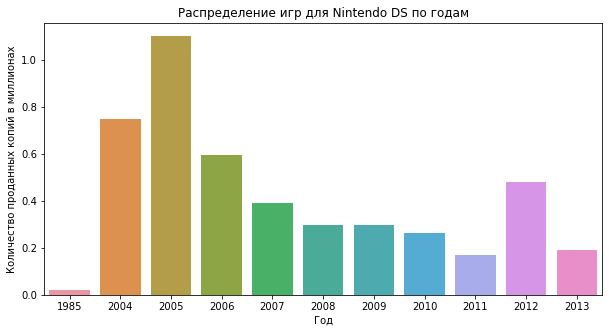

In [33]:
plt.figure(figsize=(10, 5))
df_bar(ds_sales['year_of_release'], 
       ds_sales['total_sales'], 
       'Распределение игр для Nintendo DS по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Самые высокие продажи игр для Nintendo DS были в первые два года после выхода консоли, затем продажи шли на спад, однако в 2012г. наблюдается всплеск продаж. При этом в данных есть информация о продажах игр для этой платформы в 1985г., что не может соответствовать реальности, поскольку консоль была выпущена в 2004г.

Для PlayStation:

In [34]:
ps_sales = df[df['platform'] == 'PS'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
ps_sales

,year_of_release,total_sales
0,1994,0.354706
1,1995,0.363232
2,1996,0.577439
3,1997,0.724309
4,1998,0.683427
5,1999,0.722650
6,2000,0.602313
7,2001,0.391099
8,2002,0.333500
9,2003,0.690000


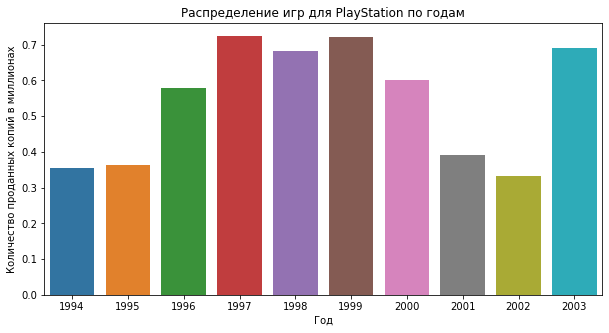

In [35]:
plt.figure(figsize=(10, 5))
df_bar(ps_sales['year_of_release'], 
       ps_sales['total_sales'], 
       'Распределение игр для PlayStation по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Для PlayStation продажи игр росли с момента выхода платформы до 1997-1999гг. с небольшим проседанием в 1998г., затем падали до 2002г. В 2003г. снова был всплеск продаж игр для данной консоли.

Для Nintendo Game Boy Advance:

In [36]:
gba_sales = df[df['platform'] == 'GBA'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
gba_sales

,year_of_release,total_sales
0,2000,0.070000
1,2001,0.575047
2,2002,0.374545
3,2003,0.377800
4,2004,0.445200
5,2005,0.250815
6,2006,0.135385
7,2007,0.566667


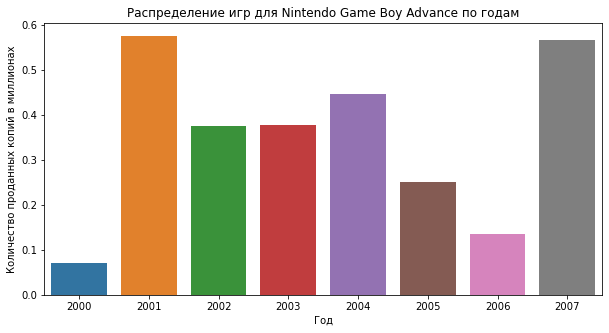

In [37]:
plt.figure(figsize=(10, 5))
df_bar(gba_sales['year_of_release'], 
       gba_sales['total_sales'], 
       'Распределение игр для Nintendo Game Boy Advance по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Для Nintendo Game Boy Advance самые высокие продажи игр были в 2001 и 2007гг., самые низкие же - в 2000 и 2006г.

Для PlayStation 4:

In [38]:
ps4_sales = df[df['platform'] == 'PS4'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
ps4_sales

,year_of_release,total_sales
0,2013,1.624375
1,2014,1.333333
2,2015,0.867883
3,2016,0.422256


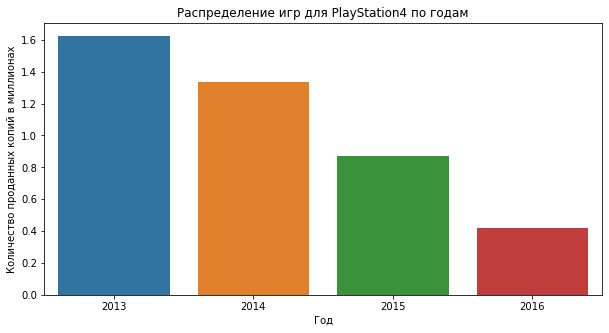

In [39]:
plt.figure(figsize=(10, 5))
df_bar(ps4_sales['year_of_release'], 
       ps4_sales['total_sales'], 
       'Распределение игр для PlayStation4 по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Для этой платформы продажи игр были рекордными в год её выхода - в 2013г. продажи составили 1,624 млн. копий и постепенно снижаются с каждым годом.

Для PlayStation Portable:

In [40]:
psp_sales = df[df['platform'] == 'PSP'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
psp_sales

,year_of_release,total_sales
0,2004,0.470667
1,2005,0.461474
2,2006,0.292698
3,2007,0.352857
4,2008,0.345500
5,2009,0.234658
6,2010,0.186383
7,2011,0.128201
8,2012,0.072547
9,2013,0.058148


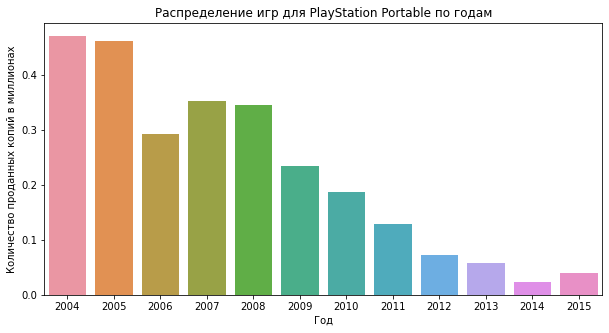

In [41]:
plt.figure(figsize=(10, 5))
df_bar(psp_sales['year_of_release'], 
       psp_sales['total_sales'], 
       'Распределение игр для PlayStation Portable по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Для PlayStation Portable также рекордные продажи игр были в год выпуска платформы - 2004г., и постепенно снижались с каждым годом за исключением 2007 и 2008гг., в которые наблюдался прирост. В 2015г. продажи также немного выше, чем в предыдущем.

Для персональных компьютеров:

In [42]:
pc_sales = df[df['platform'] == 'PC'].pivot_table(index = 'year_of_release', values = 'total_sales').reset_index()
pc_sales

,year_of_release,total_sales
0,1985,0.040000
1,1988,0.030000
2,1992,0.606000
3,1994,2.145000
4,1995,2.110000
5,1996,2.645000
6,1997,1.878333
7,1998,0.407500
8,1999,0.677143
9,2000,0.665714


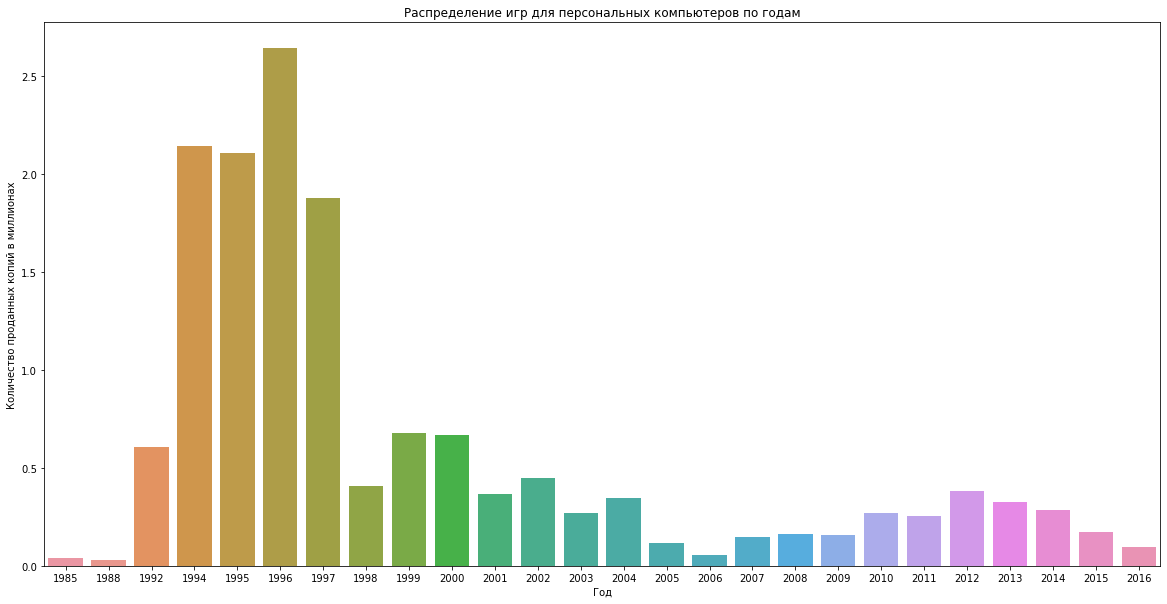

In [43]:
plt.figure(figsize=(20, 10))
df_bar(pc_sales['year_of_release'], 
       pc_sales['total_sales'], 
       'Распределение игр для персональных компьютеров по годам', 
       'Год', 
       'Количество проданных копий в миллионах');

Распределение проданных игр для персональных компьютеров строится волнообразно с максимальным пиком более 2,5 млн. копий в 1996г., далее небольшой пик - в 1999-2000гг., следующий пик - в 2012г. Наименьшие продажи игр для платформы были в 1985-1986гг., 2006 и 2016гг.

Если внимательно посмотреть на графики распределения, то можно увидеть, что "срок жизни" почти каждой из популярных платформ (кроме персональных компьютеров и недавно выпущенных платформ) не превышает 10-12 лет.

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. В целом резкий спад платформы может произойти буквально за 3 года. Но и слишком короткий период тоже брать не стоит. Для целей дальнейшего анализа возьмём данные только за последние три года.

In [44]:
df_new = df[df['year_of_release'] >= 2014]
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


Выведем в виде сводной таблицы информацию о том, как изменялись продажи в разрезе платформ за последние 3 года:

In [45]:
df_new.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


Поскольку мы анализируем данные с целью составления прогноза на 2017г., из таблицы с данными можно исключить ту платформу, для которой исходя из сводной таблицы за последние годы игры не выпускались, а именно PSP.

Рассмотрим новую таблицу с учётом этого условия:

In [46]:
df_actual = df_new[df_new['platform'] != 'PSP']

In [47]:
df_actual.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52
XOne,54.07,60.14,26.15


Учитывая, что данные за 2016г. - неполные, то из сводной таблицы видно, что продажи за последние годы растут по двум платформам: PlayStation 4 и Xbox One. Для всех остальных платформ наблюдается тенденция к снижению количества продаж.Такм образом, потенциально прибыльными платформами можно считать PlayStation 4 и Xbox One.

Построим диаграммы размаха для общих продаж по каждой из платформ, которые мы выделили выше:

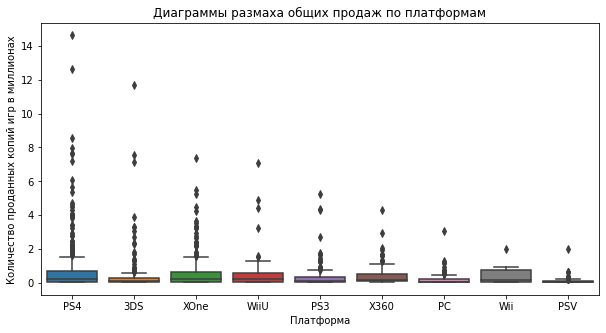

In [48]:
plt.figure(figsize = (10, 5))
platforms_boxplots = seaborn.boxplot(x = df_actual['platform'], y = df_actual['total_sales'], data = df_actual)
platforms_boxplots.axes.set_title('Диаграммы размаха общих продаж по платформам')
platforms_boxplots.set_xlabel('Платформа')
platforms_boxplots.set_ylabel('Количество проданных копий игр в миллионах')
platforms_boxplots;

Выбросы для платформы PlayStation 4 в области 14 млн. проданных копий мешают чётко увидеть масштабы диаграмм, поэтому отрегулируем ограничение по оси y таким образом, чтобы в него попадали "усы" каждой из диаграмм:

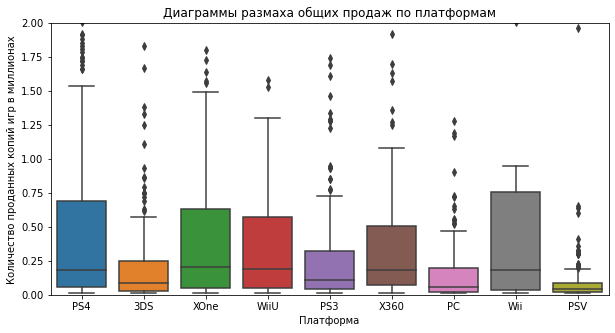

In [49]:
plt.figure(figsize = (10, 5))
plt.ylim(0, 2)
platforms_boxplots = seaborn.boxplot(x = df_actual['platform'], y = df_actual['total_sales'], data = df_actual)
platforms_boxplots.axes.set_title('Диаграммы размаха общих продаж по платформам')
platforms_boxplots.set_xlabel('Платформа')
platforms_boxplots.set_ylabel('Количество проданных копий игр в миллионах')
platforms_boxplots;

Из диаграмм размаха видно, что медианные значения и квартили общих выручек самые низкие для платформ персонального компьютера, PlayStation Vita и Nintendo 3DS, наиболее высокие же - для PlayStation 4, Xbox One и Nintendo Wii. При этом медианные значения для каждой из платформ лежат в пределах 250 000 проданных копий.

Приведём данные в столбце 'user_score' к вещественному типу для возможности совершения над ними математических операций:

In [50]:
df_actual['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

C:\Users\Gruganova\AppData\Local\Temp\ipykernel_17228\3397055090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')


Рассмотрим, как зависят от оценок пользователей и критиков продажи Xbox 360. Для этого посчитаем корреляцию между общими продажами игр для платформы и оценками пользователей:

In [51]:
df_actual[df_actual['platform'] == 'X360']['total_sales'].corr(df_actual[df_actual['platform'] == 'X360']['user_score'])

-0.138444570945665

Коэффициент корреляции Пирсона показывает, что между оценками пользователей и продажами игр для Xbox 360 очень слабая линейная связь.

Построим диаграмму рассеяния:

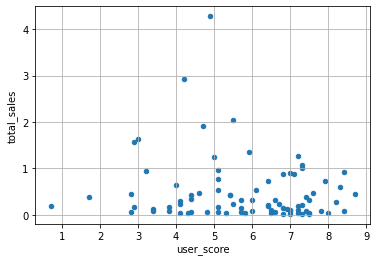

In [52]:
df_actual[df_actual['platform'] == 'X360'].plot(x = 'user_score', y = 'total_sales', kind = 'scatter', grid = True);

По диаграмме рассеяния видно, что с ростом оценки пользователей показатель количества проданных копий игр для платформы Xbox 360 увеличивается, но нелинейно: существуют и хорошо продающиеся игры с оценкой чуть ниже 5 баллов, и плохо продающиеся игры с оценкой выше 8 баллов.

Рассчитаем корреляцию для общего количества проданных копий игр для платформы Xbox 360 и оценками критиков:

In [53]:
df_actual[df_actual['platform'] == 'X360']['total_sales'].corr(df_actual[df_actual['platform'] == 'X360']['critic_score'])

0.5257228356581523

Для этой связи коэффициент корреляции уже выше - можно сказать, что между данными линейная связь средней силы.

Построим диаграмму рассеяния:

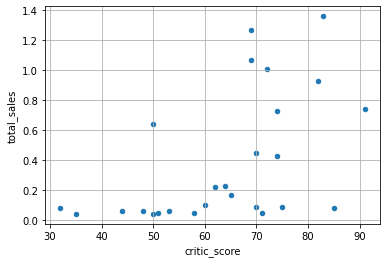

In [54]:
df_actual[df_actual['platform'] == 'X360'].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', grid = True);

Как и следовало ожидать на основании коэффициента Пирсона, по диаграмме прослеживается более сильная линейная связь между оценками критиков и продажами игр, но и здесь мы видим хорошо продающиеся игры с оценками критиков в 50 баллов и плохо продающиеся с оценками выше 80 баллов.

Рассмотрим аналогичные графики и показатели для остальных платформ. Для каждой из платформ посчитаем корреляцию между общими продажами игр для платформы и оценками пользователей:

In [55]:
display('Nintendo Wii', df_actual[df_actual['platform'] == 'Wii']['total_sales'].corr(df_actual[df_actual['platform'] == 'Wii']['user_score']))
display('PlayStation 3', df_actual[df_actual['platform'] == 'PS3']['total_sales'].corr(df_actual[df_actual['platform'] == 'PS3']['user_score']))
display('PlayStation 4', df_actual[df_actual['platform'] == 'PS4']['total_sales'].corr(df_actual[df_actual['platform'] == 'PS4']['user_score']))
display('Nintendo 3DS', df_actual[df_actual['platform'] == '3DS']['total_sales'].corr(df_actual[df_actual['platform'] == '3DS']['user_score']))
display('Персональные компьютеры', df_actual[df_actual['platform'] == 'PC']['total_sales'].corr(df_actual[df_actual['platform'] == 'PC']['user_score']))
display('Xbox One', df_actual[df_actual['platform'] == 'XOne']['total_sales'].corr(df_actual[df_actual['platform'] == 'XOne']['user_score']))
display('Nintendo Wii U', df_actual[df_actual['platform'] == 'WiiU']['total_sales'].corr(df_actual[df_actual['platform'] == 'WiiU']['user_score']))
display('PlayStation Vita', df_actual[df_actual['platform'] == 'PSV']['total_sales'].corr(df_actual[df_actual['platform'] == 'PSV']['user_score']))

'Nintendo Wii'

1.0

'PlayStation 3'

-0.16676141347662116

'PlayStation 4'

-0.040131589472697356

'Nintendo 3DS'

0.2151932718527028

'Персональные компьютеры'

-0.07159665703472452

'Xbox One'

-0.0703839280647581

'Nintendo Wii U'

0.4079264579217078

'PlayStation Vita'

-0.16845504978064446

Почти для всех платформ линейная связь между количеством проданных копий игр и оценкой пользователей несильная, хотя для некоторых выше, чем для других - например, для Nintendo Wii U линейная связь почти средней силы, а для Nintendo Wii - очень сильная линейная связь.

Также для каждой из платформ рассчитаем коэффициент корреляции между количеством проданных копий и оценками критиков:

In [56]:
display('Nintendo Wii', df_actual[df_actual['platform'] == 'Wii']['total_sales'].corr(df_actual[df_actual['platform'] == 'Wii']['critic_score']))
display('PlayStation 3', df_actual[df_actual['platform'] == 'PS3']['total_sales'].corr(df_actual[df_actual['platform'] == 'PS3']['critic_score']))
display('PlayStation 4', df_actual[df_actual['platform'] == 'PS4']['total_sales'].corr(df_actual[df_actual['platform'] == 'PS4']['critic_score']))
display('Nintendo 3DS', df_actual[df_actual['platform'] == '3DS']['total_sales'].corr(df_actual[df_actual['platform'] == '3DS']['critic_score']))
display('Персональные компьютеры', df_actual[df_actual['platform'] == 'PC']['total_sales'].corr(df_actual[df_actual['platform'] == 'PC']['critic_score']))
display('Xbox One', df_actual[df_actual['platform'] == 'XOne']['total_sales'].corr(df_actual[df_actual['platform'] == 'XOne']['critic_score']))
display('Nintendo Wii U', df_actual[df_actual['platform'] == 'WiiU']['total_sales'].corr(df_actual[df_actual['platform'] == 'WiiU']['critic_score']))
display('PlayStation Vita', df_actual[df_actual['platform'] == 'PSV']['total_sales'].corr(df_actual[df_actual['platform'] == 'PSV']['critic_score']))

'Nintendo Wii'

nan

'PlayStation 3'

0.44657460493190704

'PlayStation 4'

0.40266141068104083

'Nintendo 3DS'

0.31411749286905105

'Персональные компьютеры'

0.17463413769350036

'Xbox One'

0.42867694370333226

'Nintendo Wii U'

0.370201412480884

'PlayStation Vita'

0.04266490657009526

Почти для всех платформ также видим в данном случае более высокий коэффициент корреляции, но снова недостаточно высокий, чтобы говорить о сильной линейной связи между данными. Выделяется здесь платформа Nintendo Wii - для этой платформы корреляция между оценками критиков и продажами игр нулевая, в то время как мы помним, что корреляция с оценками пользователей - очень сильная.

Также построим диаграммы рассеяния, отражающие взаимосвязь между указанными данными, для Nintendo Wii:

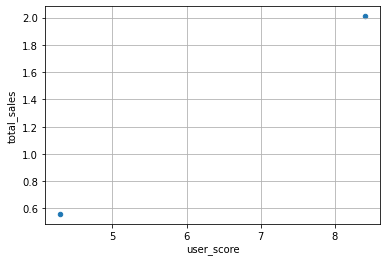

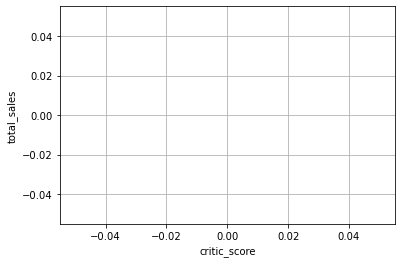

In [57]:
df_actual[df_actual['platform'] == 'Wii'].plot(x = 'user_score', y = 'total_sales', kind = 'scatter', grid = True);
df_actual[df_actual['platform'] == 'Wii'].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', grid = True);

Для PlayStation 3:

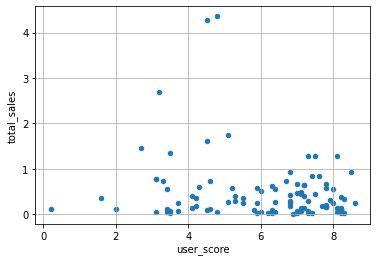

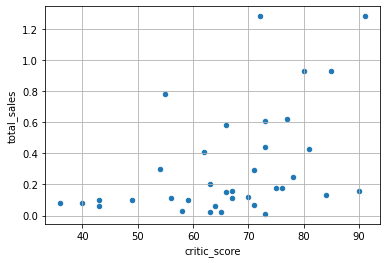

In [58]:
df_actual[df_actual['platform'] == 'PS3'].plot(x = 'user_score', y = 'total_sales', kind = 'scatter', grid = True);
df_actual[df_actual['platform'] == 'PS3'].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', grid = True);

Для PlayStation 4:

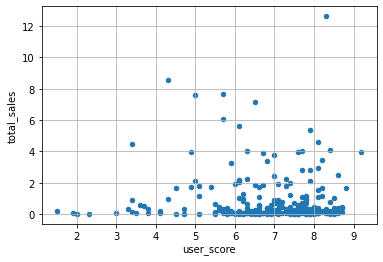

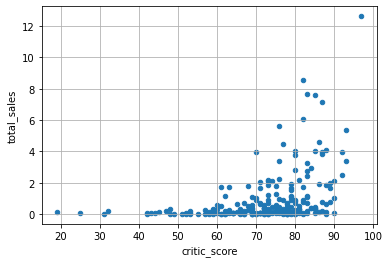

In [59]:
df_actual[df_actual['platform'] == 'PS4'].plot(x = 'user_score', y = 'total_sales', kind = 'scatter', grid = True);
df_actual[df_actual['platform'] == 'PS4'].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', grid = True);

Для Nintendo 3DS:

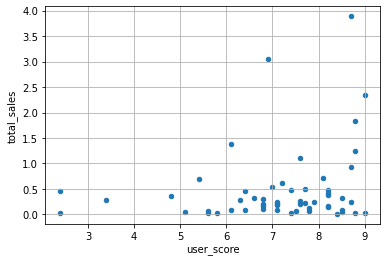

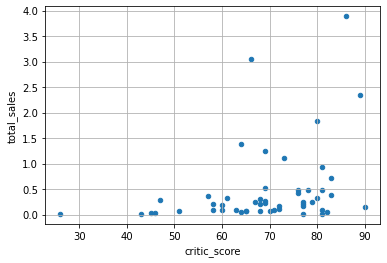

In [60]:
df_actual[df_actual['platform'] == '3DS'].plot(x = 'user_score', y = 'total_sales', kind = 'scatter', grid = True);
df_actual[df_actual['platform'] == '3DS'].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', grid = True);

Для персональных компьютеров:

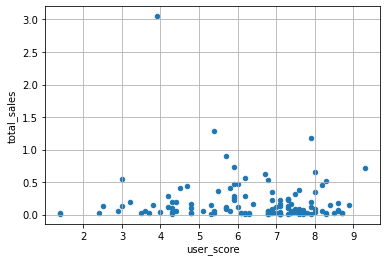

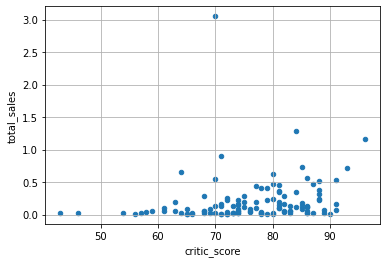

In [61]:
df_actual[df_actual['platform'] == 'PC'].plot(x = 'user_score', y = 'total_sales', kind = 'scatter', grid = True);
df_actual[df_actual['platform'] == 'PC'].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', grid = True);

Для Xbox One:

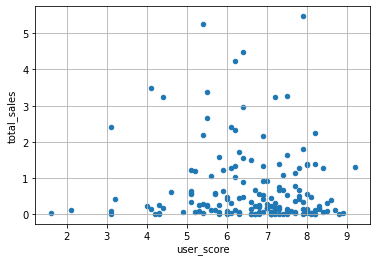

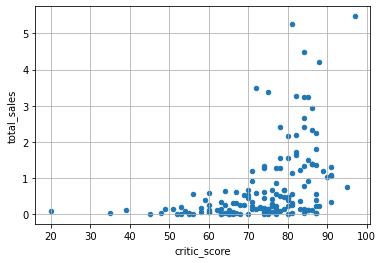

In [62]:
df_actual[df_actual['platform'] == 'XOne'].plot(x = 'user_score', y = 'total_sales', kind = 'scatter', grid = True);
df_actual[df_actual['platform'] == 'XOne'].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', grid = True);

Для Nintendo Wii U:

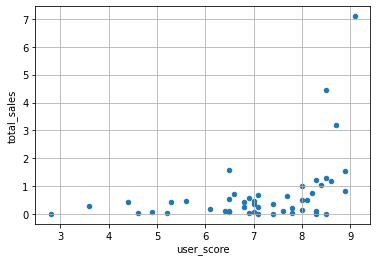

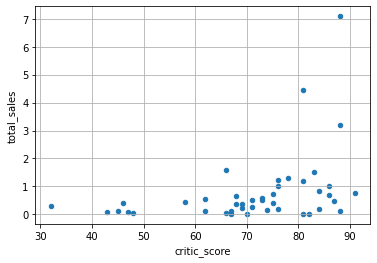

In [63]:
df_actual[df_actual['platform'] == 'WiiU'].plot(x = 'user_score', y = 'total_sales', kind = 'scatter', grid = True);
df_actual[df_actual['platform'] == 'WiiU'].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', grid = True);

Для PlayStation Vita:

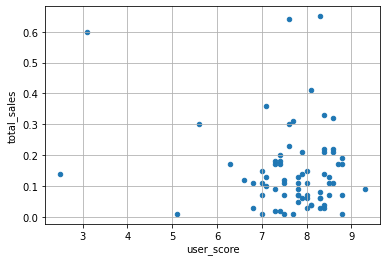

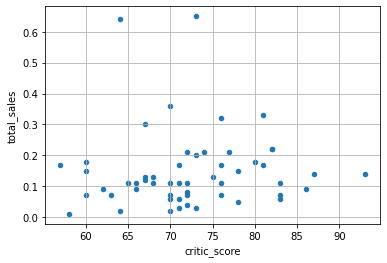

In [64]:
df_actual[df_actual['platform'] == 'PSV'].plot(x = 'user_score', y = 'total_sales', kind = 'scatter', grid = True);
df_actual[df_actual['platform'] == 'PSV'].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', grid = True);

Все диаграммы соотносятся с ранее подсчитанными коэффициентами корреляции и отражают слабую линейную зависимость между данными.

Посмотрим распределение медианного и среднего значений количества проданных копий игр по жанрам:

In [65]:
sales_by_genres = df_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['mean', 'median']).reset_index()
sales_by_genres.columns = ['_'.join(col).strip() for col in sales_by_genres.columns.values]
sales_by_genres

,genre_,mean_total_sales,median_total_sales
0,Action,0.324894,0.090
1,Adventure,0.096685,0.030
2,Fighting,0.470333,0.125
3,Misc,0.338108,0.090
4,Platform,0.476053,0.140
5,Puzzle,0.157857,0.045
6,Racing,0.398841,0.090
7,Role-Playing,0.459005,0.110
8,Shooter,1.335469,0.515
9,Simulation,0.298409,0.100


Выведем диаграмму для средних значений:

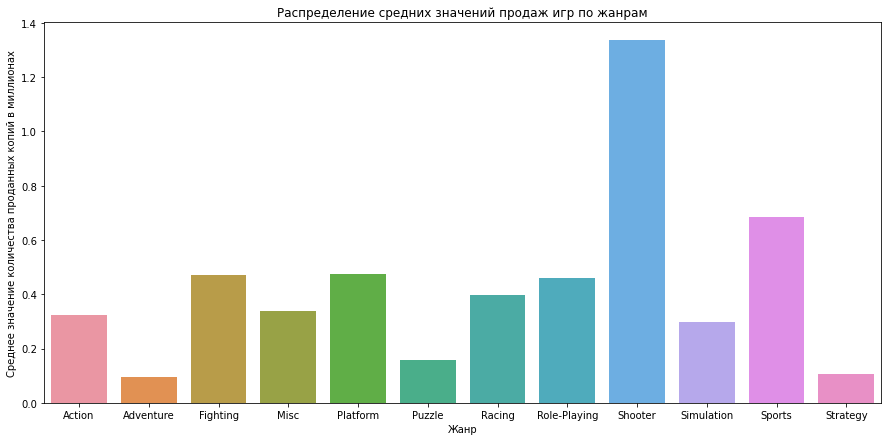

In [66]:
plt.figure(figsize=(15, 7))
df_bar(sales_by_genres['genre_'], sales_by_genres['mean_total_sales'], 'Распределение средних значений продаж игр по жанрам', 
       'Жанр', 'Среднее значение количества проданных копий в миллионах');

И диаграмму для медианных значений:

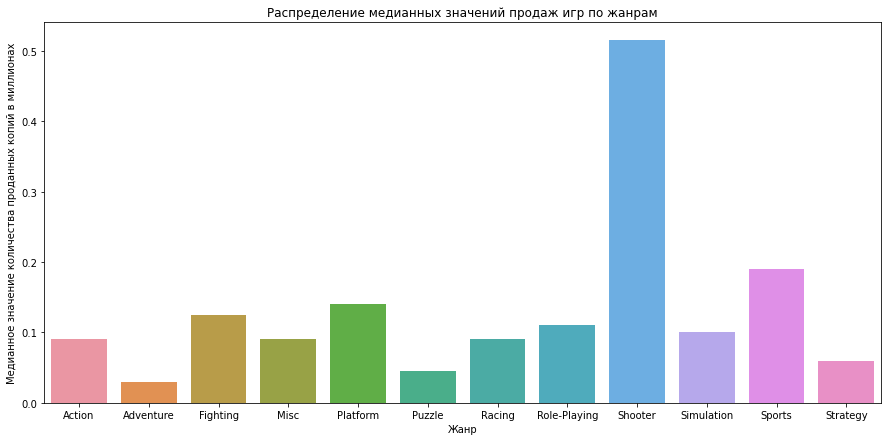

In [67]:
plt.figure(figsize=(15, 7))
df_bar(sales_by_genres['genre_'], sales_by_genres['median_total_sales'], 'Распределение медианных значений продаж игр по жанрам', 
       'Жанр', 'Медианное значение количества проданных копий в миллионах');

Обе диаграммы показали, что наиболее прибыльные игры - в жанре 'Shooter', а наименее - в жанрах 'Adventure', 'Puzzle' и 'Strategy'.

Для распределения по жанрам также построим диаграмму размаха:

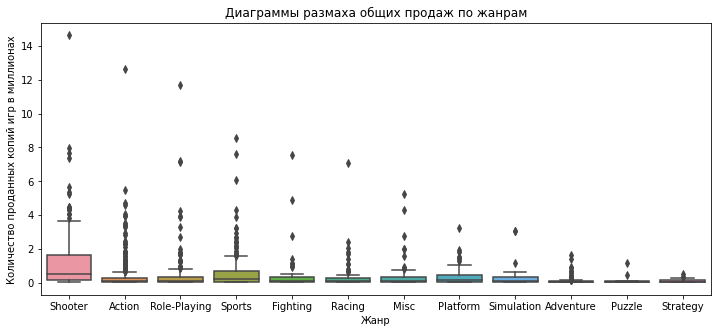

In [68]:
plt.figure(figsize = (12, 5))
platforms_boxplots = seaborn.boxplot(x = df_actual['genre'], y = df_actual['total_sales'], data = df_actual)
platforms_boxplots.axes.set_title('Диаграммы размаха общих продаж по жанрам')
platforms_boxplots.set_xlabel('Жанр')
platforms_boxplots.set_ylabel('Количество проданных копий игр в миллионах')
platforms_boxplots;

Выбросы для жанра 'Shooter' в области 14 млн. проданных копий (и жанров 'Action' и 'Role-Playing') мешают чётко увидеть масштабы диаграмм, поэтому отрегулируем ограничение по оси y таким образом, чтобы в него попадали "усы" каждой из диаграмм:

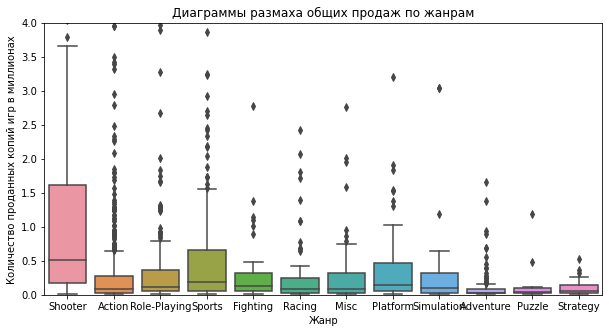

In [69]:
plt.figure(figsize = (10, 5))
plt.ylim(0, 4)
platforms_boxplots = seaborn.boxplot(x = df_actual['genre'], y = df_actual['total_sales'], data = df_actual)
platforms_boxplots.axes.set_title('Диаграммы размаха общих продаж по жанрам')
platforms_boxplots.set_xlabel('Жанр')
platforms_boxplots.set_ylabel('Количество проданных копий игр в миллионах')
platforms_boxplots;

Данные, которые мы видим на диаграмме размаха, соответствуют выводам, сделанным по графикам средних и медианных значений продаж по жанрам.

## Портреты пользователей по регонам

Определим топ-5 самых популярных платформ для пользователей из Северной Америки:

In [70]:
na_top_platforms = df_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
na_top_platforms['rate'] = (na_top_platforms['na_sales'] / na_top_platforms['na_sales'].sum()) * 100
na_top_platforms.sort_values(by = 'na_sales', ascending = False).head()

,na_sales,rate
platform,,
PS4,98.61,34.714497
XOne,81.27,28.610153
X360,28.30,9.962684
3DS,22.64,7.970147
PS3,22.05,7.762445


И визуализируем их на круговой диаграмме:

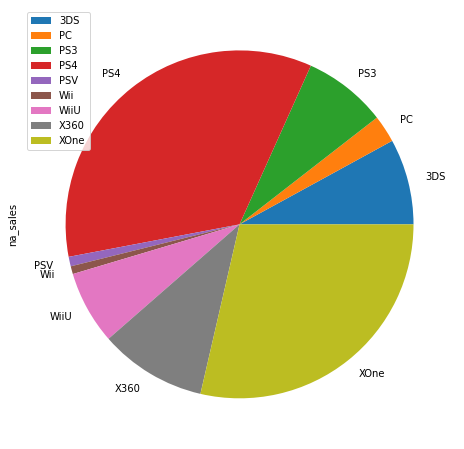

In [71]:
na_top_platforms.plot(y = 'na_sales', kind = 'pie', figsize = (8, 8));

Для пользователей из Европы:

In [72]:
eu_top_platforms = df_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
eu_top_platforms['rate'] = (eu_top_platforms['eu_sales'] / eu_top_platforms['eu_sales'].sum()) * 100
eu_top_platforms.sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales,rate
platform,,
PS4,130.04,48.041968
XOne,46.25,17.086597
PS3,25.54,9.435496
PC,17.97,6.638836
3DS,16.12,5.955372


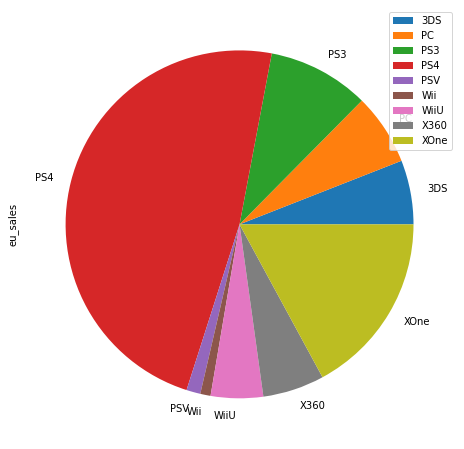

In [73]:
eu_top_platforms.plot(y = 'eu_sales', kind = 'pie', figsize = (8, 8));

Для пользователей из Японии:

In [74]:
jp_top_platforms = df_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
jp_top_platforms['rate'] = (jp_top_platforms['jp_sales'] / jp_top_platforms['jp_sales'].sum()) * 100
jp_top_platforms.sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales,rate
platform,,
3DS,44.24,47.708401
PS4,15.02,16.197563
PSV,14.54,15.679931
PS3,11.22,12.099644
WiiU,7.31,7.883101


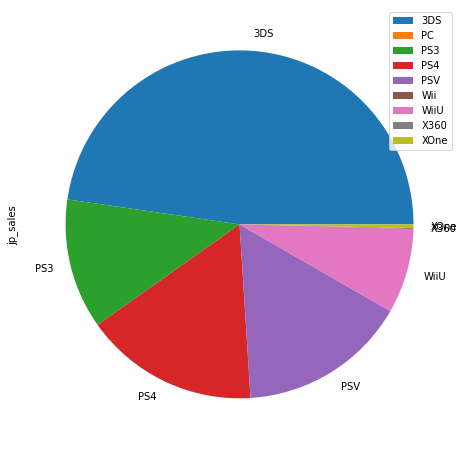

In [75]:
jp_top_platforms.plot(y = 'jp_sales', kind = 'pie', figsize = (8, 8));

Из сводных таблиц мы видим, что самыми популярными платформами являются:
1. Для Северной Америки - PlayStation 4 и Xbox One (34,71% и 28,61% соответственно от общих продаж в регионе за последние годы);
2. Для Европы - PlayStation 4 (с большим отрывом от других платформ) и Xbox One (48,04% и 17,09% соответственно от общих продаж в регионе за последние годы);
3. Для Японии - Nintendo 3DS с большим отрывом (47,71% от общих продаж в регионе за последние годы).

То есть для пользователей из Северной Америки и Европы популярные платформы - примерно одни и те же, но с разным распределением по долям от общих продаж. А вот для пользователей из Японии наиболее популярной платформой является Nintendo 3DS, продажи игр для которой в других регионах не превышает 8%. При этом в топ-10 по проданным копиям игр за всё время эта платформа вообще не попала.

Определим топ-5 самых популярных жанров для пользователей из Северной Америки:

In [76]:
na_top_genres = df_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
na_top_genres.sort_values(by = 'na_sales', ascending = False).head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


И визуализируем:

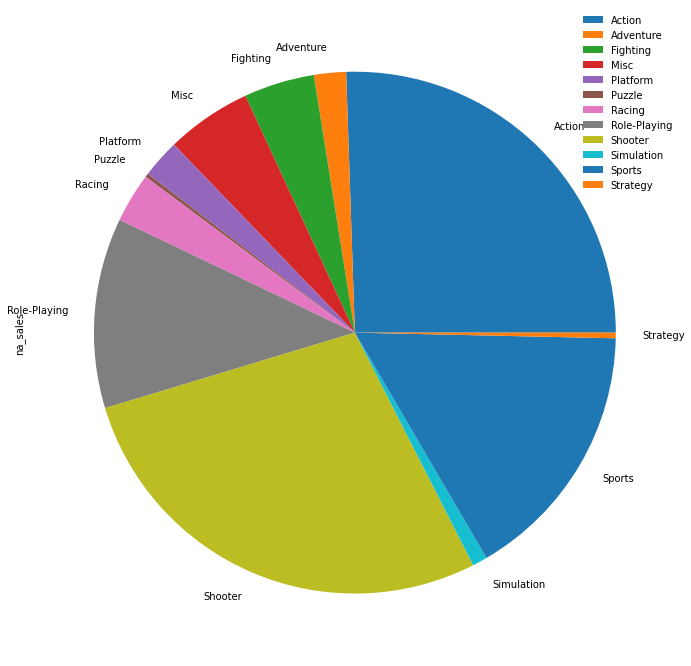

In [77]:
na_top_genres.plot(y = 'na_sales', kind = 'pie', figsize = (12, 12));
plt.legend(framealpha = 0.05);

Для пользователей из Европы:

In [78]:
eu_top_genres = df_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
eu_top_genres.sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


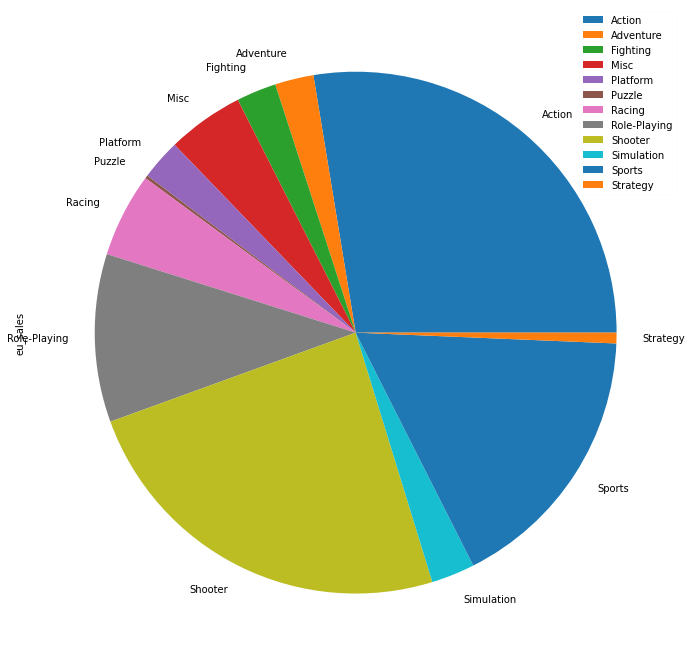

In [79]:
eu_top_genres.plot(y = 'eu_sales', kind = 'pie', figsize = (12, 12));
plt.legend(framealpha = 0.05);

Для пользователей из Японии:

In [80]:
jp_top_genres = df_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
jp_top_genres.sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.38
Fighting,6.37
Misc,5.59
Shooter,4.87


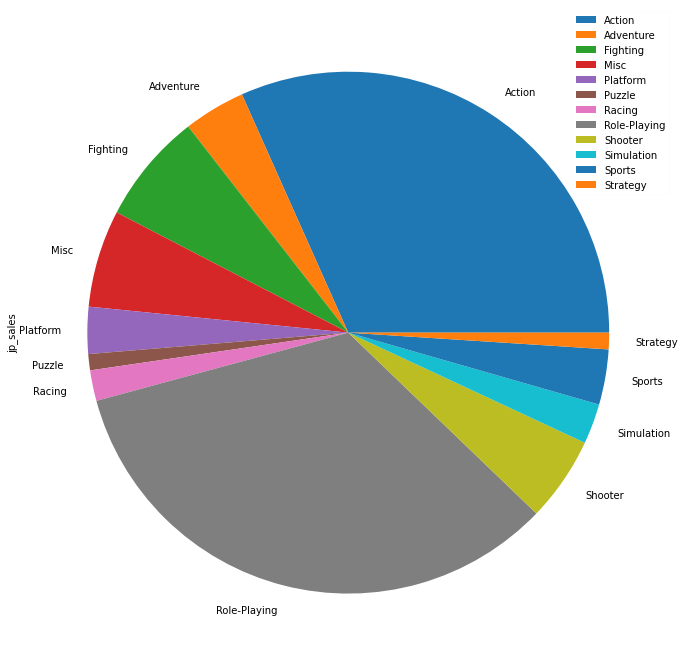

In [81]:
jp_top_genres.plot(y = 'jp_sales', kind = 'pie', figsize = (12, 12));
plt.legend(framealpha = 0.05);

По жанрам картина выглядит почти аналогичной той, что мы увидели по платформам:
1. Для пользователей из Северной Америки наиболее популярны игры в жанрах Action, Shooter и Sports;
2. Для пользователей из Европы первая тройка топа выглядит так же, но с другим распределением по долям от продаж;
3. Для Японии на первое место вышел жанр Role-Playing, а жанр Shooter занял последнее место в топе, не превышая доли в 5%.

Это логично соотносится с самой популярной платформой на рынке Японии, ведь большая часть игр для этой платформы как раз была выпущена в жанре Role-Playing, а вот игр в жанре Shooter не было продано вообще:

In [82]:
df_actual[df_actual['platform'] == '3DS'].groupby('genre')['total_sales'].sum().sort_values(ascending = False)

genre
Role-Playing    40.02
Action          22.06
Fighting         8.10
Simulation       4.13
Platform         3.98
Misc             3.85
Adventure        1.57
Sports           1.32
Puzzle           0.87
Strategy         0.78
Name: total_sales, dtype: float64

Посмотрим, влияет ли рейтинг ESRB на продажи в регионах:

In [83]:
rating_group = df_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
rating_group

,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
T,38.95,34.07,14.78
unknown,64.72,58.95,56.54


Построим круговые диаграммы для каждого из регионов.

Для Северной Америки:

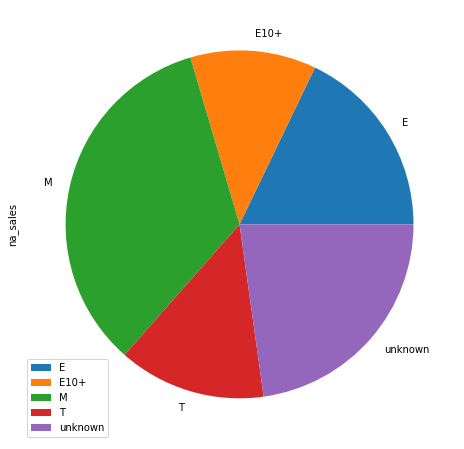

In [84]:
rating_group.plot(y = 'na_sales', kind = 'pie', figsize = (8, 8));

Для Европы:

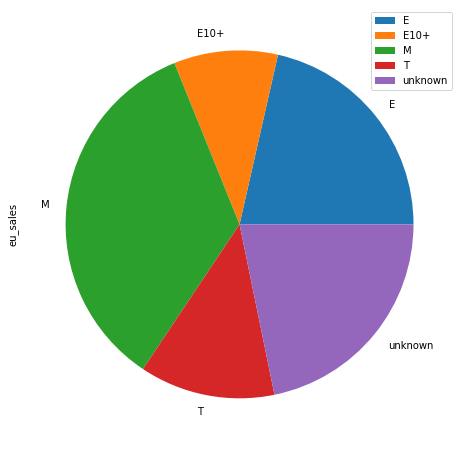

In [85]:
rating_group.plot(y = 'eu_sales', kind = 'pie', figsize = (8, 8));

Для Японии:

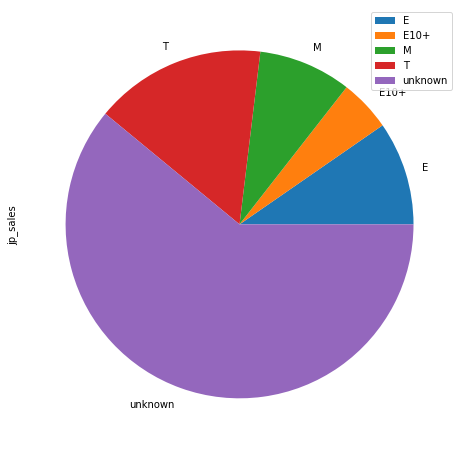

In [86]:
rating_group.plot(y = 'jp_sales', kind = 'pie', figsize = (8, 8));

По графикам снова видим отличие рынка Японии от остальных рынков: в Северной Америке и Европе превалирующее количество игр - с рейтингами 'М', несколько меньше - в жанрах 'Е' и тех, данных о которых в таблице не было, а вот для Японии это - в основном игры, для которых отсутствовали данные о жанре, и следующий по популярности жанр - 'T'. Большая доля игр с рейтингом 'unknown' на графике для пользователей из Японии следует из того, что в этом регионе существует другая система рейтингов.

## Проверка гипотез

Проверим следующую гипотезу:
    
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    
В качестве нулевой гипотезы исходя из приципа равенства средних зададим "Средний пользовательский рейтинг платформы XOne = средний пользовательский рейтинг платформы PC". 

В качестве альтернативной гипотезы - "Средний пользовательский рейтинг платформы XOne != средний пользовательский рейтинг платформы PC"

Значение альфа будем выбирать исходя из цены ошибки в оценке данных. Для этой гипотезы примем альфа = 0,01.

In [87]:
sample_xbox = df_actual[df_actual['platform'] == 'XOne']['user_score'].dropna()
sample_pc = df_actual[df_actual['platform'] == 'PC']['user_score'].dropna()
alpha = 0.01
results = st.ttest_ind(sample_xbox, sample_pc, equal_var = False)
display(results.pvalue)
if results.pvalue / 2 < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832

'Не получилось отвергнуть нулевую гипотезу'

Если бы мы приняли альфа 0,05 - гипотеза была бы отвергнута. Но поскольку анализ данных производится с целью прогноза продаж игр на следующий год, значение альфа лучше принять меньшим (чем выше цена ошибки, тем меньше альфа). 

Проверим гипотезу:

       Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
       
В качестве нулевой гипотезы зададим "Средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports".

В качестве альтернативной гипотезы - "Средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports".

Значение альфа примем 0,01.

In [88]:
sample_action = df_actual[df_actual['genre'] == 'Action']['user_score'].dropna()
sample_sports = df_actual[df_actual['genre'] == 'Sports']['user_score'].dropna()
alpha = 0.01
results = st.ttest_ind(sample_action, sample_sports, equal_var = False)
display(results.pvalue)
if results.pvalue / 2 < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14

'Отвергаем нулевую гипотезу'

В данном случае значение pvalue оказалось настолько мало, что даже при условии значения альфа 0,01 гипотеза оказалась отвергнутой. То есть с уверенностью можно сказать, что пользовательские оценки жанров Action и Sports не одинаковы.

## Выводы

Анализ данных показал следующее:

- при рассмотрении данных о выходе игр за период 1980-2016гг. выявлена тенденция роста выпускаемых игр по годам к 2008-2009гг., однако неравномерная - например, в 1998г. и 2022г. игр было выпущено больше, чем в годах, следующих за ними (1999 и 2003гг. соответственно). Наибольшее количество игр выпущено в 2008 и 2009 гг. - 1427 и 1426, что составляет около 17% от всех игр, данные по которым собраны в таблице. После 2011г. наблюдается резкий спад количества выпускаемых игр.
- чётко выделяются платформы как с наибольшими (например, PS2 - 14% от суммы всех продаж за все годы), так и с наименьшими продажами - несколько платформ с долей менее 1% от общих продаж.
- за период 1980-2016гг. можно выделить топ-10 платформ по количеству проданных игр, а именно:
    1. PlayStation 2;
    2. Xbox 360;
    3. PlayStation 3;
    4. Nintendo Wii;
    5. Nintendo DS;
    6. PlayStation;
    7. Nintendo Game Boy Advance;
    8. PlayStation 4;
    9. PlayStation Portable;
    10. Персональный компьютер.
- был выявлен характерный "срок жизни" платформ - 10-12 лет (кроме персональных компьютеров).
- медианные значения и квартили общих выручек самые низкие для платформ персонального компьютера, PlayStation Vita и Nintendo 3DS, наиболее высокие же - для PlayStation 4, Xbox One и Nintendo Wii. При этом медианные значения для каждой из платформ лежат в пределах 250 000 проданных копий.
- для каждой платформы линейная связь между количеством проданных копий игр и оценкой пользователей несильная, хотя для некоторых выше, чем для других - например, для Nintendo Wii U линейная связь почти средней силы, а для Nintendo Wii - очень сильная линейная связь.
- для всех платформ коэффициент корреляции между количеством проданных игр и оценкой критиков выше, чем между количеством игр и пользовательской оценкой, но снова недостаточно высокий, чтобы говорить о сильной линейной связи между данными. Выделяется здесь платформа Nintendo Wii - для этой платформы корреляция между оценками критиков и продажами игр нулевая, в то время как мы помним, что корреляция с оценками пользователей - очень сильная.
- наиболее прибыльные игры - в жанре 'Shooter', а наименее - в жанрах 'Adventure', 'Puzzle' и 'Strategy'.
- портреты пользователей регионов Северной Америки и Европы очень схожи между собой - им нравятся почти одни и те же платформы и жанры, а пользователи из Японии предпочитают платформу Nintendo 3DS и соответствующий жанр Role-Playing.
- опровергнуть гипотезу о том, что средние пользовательские оценки платформ Xbox One и PC равны, не получилось.
- средние пользовательские оценки жанров Action и Sports не равны.